In [9]:
import IPython
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import sklearn as sk
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time

In [2]:
'''
import file

'''

beauty=pd.read_csv(r'BeautyData.csv',delimiter=',',encoding='iso-8859-1',low_memory=False)

In [3]:
pd.DataFrame(beauty)
beauty.head()

,CourseEvals,BeautyScore,female,lower,nonenglish,tenuretrack
0,3.235245,0.201567,1,0,0,1
1,3.226328,-0.826081,0,0,0,1
2,3.647712,-0.660333,0,0,0,1
3,3.372062,-0.766312,1,0,0,1
4,4.292705,1.421445,1,0,0,1


In [4]:
'''
Data QC

'''

beauty.isnull().sum()

CourseEvals    0
BeautyScore    0
female         0
lower          0
nonenglish     0
tenuretrack    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
'''
defining target and features

'''

y=beauty['CourseEvals']
X=beauty.drop(['CourseEvals'],axis=1)

X

,BeautyScore,female,lower,nonenglish,tenuretrack
0,0.201567,1,0,0,1
1,-0.826081,0,0,0,1
2,-0.660333,0,0,0,1
3,-0.766312,1,0,0,1
4,1.421445,1,0,0,1
...,...,...,...,...,...
458,1.143045,0,1,0,1
459,1.143045,0,0,0,1
460,0.332051,1,0,1,1
461,0.332051,1,0,1,1


In [17]:
'''
train test split

'''


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train sample, features{}'.format(X_train.shape))
print('y_train sample {}'.format(y_train.shape))
print('X_test sample features {}'.format(X_test.shape))
print('y_test {}'.format(y_test.shape))

X_train sample, features(370, 5)
y_train sample (370,)
X_test sample features (93, 5)
y_test (93,)


In [18]:
'''
Random Forest Algorithm

Optimize parameter

n estimator

'''

time1=time.time() 


min_n_est=5
max_n_est=500
n_step=5
rmse_n_est=[] 
for i in range(min_n_est,max_n_est,n_step):
    bty_mod=RandomForestRegressor(n_estimators=i, max_depth=100, max_leaf_nodes=500, min_samples_split=2, max_features='sqrt', random_state=42)
    bty_mod.fit(X_train,y_train)
    
    y_pred=bty_mod.predict(X_test)
    rmse_n_est.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

time2=time.time()
time_diff=time2-time1

print('total time {}'.format(time_diff))

total time 32.096593141555786


In [19]:
'''
Error table for 

n estimator evaluation

'''
n=list(range(min_n_est,max_n_est,n_step))

err_matrix=pd.DataFrame({'n_estimator':n,
                         'rmse':rmse_n_est},
                        columns=['n_estimator','rmse'])
err_matrix


,n_estimator,rmse
0,5,0.511921
1,10,0.508835
2,15,0.509756
3,20,0.503125
4,25,0.501046
...,...,...
94,475,0.494770
95,480,0.494790
96,485,0.494947
97,490,0.495178


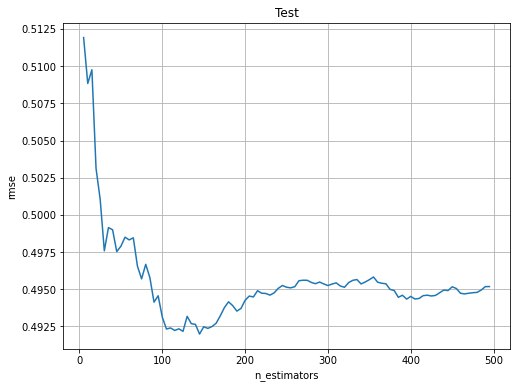

In [92]:
'''
Elbow plot for e estimator optimization

'''


fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(8)
ax.plot(range(min_n_est,max_n_est,n_step), rmse,)

ax.set(xlabel='n_estimators', ylabel='rmse',
       title='Test')
ax.grid()
fig.savefig("test.png")
plt.show()


In [20]:
print('Minimum rmse is ',round(err_matrix['rmse'].min(),4))
print('The optial n esimator is ',err_matrix['n_estimator'][err_matrix['rmse'].idxmin()])

Minimum rmse is  0.492
The optial n esimator is  145


In [21]:
'''
This is to test the optimal max depth
@ n estimator=145

'''

min_depth=1
max_depth=100
d_step=1
rmse_depth=[]

for i in range(min_depth,max_depth,d_step):
    bty_mod=RandomForestRegressor(n_estimators=145, max_depth=i, max_leaf_nodes=500, min_samples_split=2, max_features='sqrt', random_state=42)
    bty_mod.fit(X_train,y_train)
    
    y_pred=bty_mod.predict(X_test)
    rmse_depth.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

time2=time.time()
time_diff=time2-time1

print('total time {}'.format(time_diff))

253.38629388809204

In [22]:
'''
error table for 

max depth evaluation

'''

n=list(range(min_depth,max_depth,d_step))

err_matrix=pd.DataFrame({'max_depth':n,
                         'rmse':rmse_depth},
                        columns=['max_depth','rmse'])
err_matrix

,max_depth,rmse
0,1,0.448857
1,2,0.429566
2,3,0.420905
3,4,0.421589
4,5,0.429894
...,...,...
94,95,0.491990
95,96,0.491990
96,97,0.491990
97,98,0.491990


In [23]:
print('Minimum rmse is ',round(err_matrix['rmse'].min(),4))
print('The optimal max depth is ',err_matrix['max_depth'][err_matrix['rmse'].idxmin()])

Minimum rmse is  0.4209
The optimal max depth is  3


In [24]:
'''
Optimize max_leaf_nodes

'''

min_leaf=2
max_leaf=100
l_step=1
rmse_leaf=[]

for i in range(min_leaf,max_leaf,l_step):
    bty_mod=RandomForestRegressor(n_estimators=145, max_depth=3, max_leaf_nodes=i, min_samples_split=2, max_features='sqrt', random_state=42)
    bty_mod.fit(X_train,y_train)
    
    y_pred=bty_mod.predict(X_test)
    rmse_leaf.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

time2=time.time()
time_diff=time2-time1

print('total time {}'.format(time_diff))

total time 427.4581923484802


In [26]:
n=list(range(min_leaf,max_leaf,l_step))

err_matrix=pd.DataFrame({'max_leaf':n,
                         'rmse':rmse_leaf},
                        columns=['max_leaf','rmse'])
err_matrix.head(10)

,max_leaf,rmse
0,2,0.448857
1,3,0.431999
2,4,0.424252
3,5,0.422015
4,6,0.421255
5,7,0.420143
6,8,0.420905
7,9,0.420905
8,10,0.420905
9,11,0.420905


In [27]:
print('Minimum rmse is ',round(err_matrix['rmse'].min(),4))
print('The optimal max leaf nodes # is ',err_matrix['max_leaf'][err_matrix['rmse'].idxmin()])

Minimum rmse is  0.4201
The optimal max leaf nodes # is  7


In [29]:
'''
Final model

n_estimators=145
max_depth=3
max_leaf_nodes=7

'''
rmse=[]

bty_mod=RandomForestRegressor(n_estimators=145, max_depth=3, max_leaf_nodes=7, min_samples_split=2, max_features='sqrt', random_state=42)
bty_mod.fit(X_train,y_train)
    
y_pred=bty_mod.predict(X_test)
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [30]:
'''
Feature importance ranking

'''


importances = bty_mod.feature_importances_

feature_names=list(beauty)

feature_names.remove('CourseEvals')

features_importance = pd.Series(importances, index=feature_names)

print(round(features_importance,2))

BeautyScore    0.59
female         0.18
lower          0.15
nonenglish     0.04
tenuretrack    0.04
dtype: float64


In [79]:
feature_names

['BeautyScore', 'female', 'lower', 'nonenglish', 'tenuretrack']

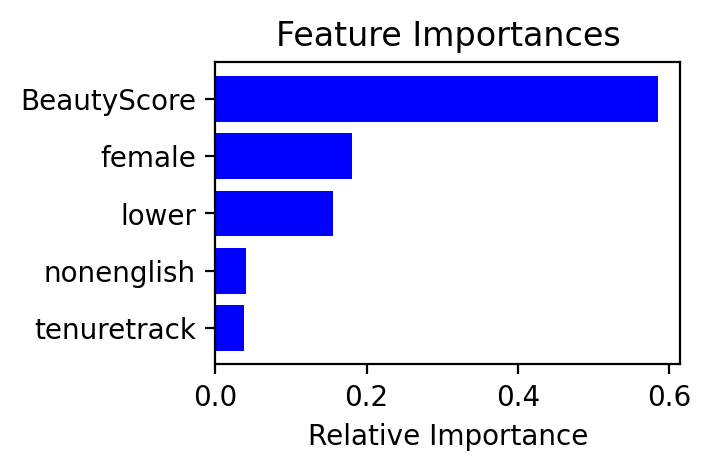

In [147]:
'''
Plot feature importance bar plot

'''

Plot
plt.figure(figsize=(3, 2), dpi=200)
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.barh(feature_names,features_importance, color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [161]:
'''
Evaluating the Algorithm

'''

from sklearn import metrics 
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:',round(metrics.mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))

Mean Absolute Error: 0.3491
Mean Squared Error: 0.1765
Root Mean Squared Error: 0.4201
